## Initialize

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In the following, we can input the parameters as the tutorial.

In [86]:
resolution = 30   # pixels/um
r = 0.2
sx = 21
sy = 27
hsx=(sx-1)/2
hsy=(sy-1)/2

fcen = 0.38   # pulse center frequency
df = 0.005  

dpml=2.0
pml_layers = [mp.PML(dpml)]

Next, we do the initial run for the transmission without any hole

-----------
Initializing structure...
time for choose_chunkdivision = 0.00654078 s
Working in 2D dimensions.
Computational cell is 25 x 31 x 0 with resolution 30
     cylinder, center = (-10,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-9,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-8,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-7,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-6,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-5,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
      

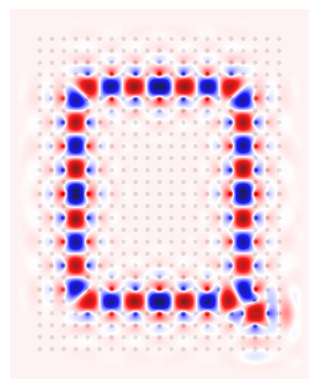

In [106]:
sxt = sx+2*dpml
syt = sy+2*dpml
cell = mp.Vector3(sxt,syt,0)
pl = mp.Ez
geometry = []
#        if i!=hs:
for i in range(sy):
    for j in range(sx):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(j-hsx,i-hsy), material=mp.Medium(epsilon=8.9)))

qx = 15
qxh = (qx-1)/2
qy = 19
qyh = (qy-1)/2

geometry.append(mp.Block(size=mp.Vector3(qx,1,mp.inf), center=mp.Vector3(0,-qyh)))
geometry.append(mp.Block(size=mp.Vector3(qx,1,mp.inf), center=mp.Vector3(0,qyh)))
geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(-qxh,0)))
geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(qxh,0)))
geometry.append(mp.Block(size=mp.Vector3(1,5,mp.inf), center=mp.Vector3(qxh,qyh), e2=mp.Vector3(-1,-1,0)))
                
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(0,-qyh),
                 size=mp.Vector3(0,0.5)),
      mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(0,qyh),
                 size=mp.Vector3(0,0.5)),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(-qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(0.4, fwidth=df*2),
                 component=pl,
                 amplitude=15.0,
                 center=mp.Vector3(8,10),
                 size=mp.Vector3(0.3,0.3))]
#sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)
sim.run(until=137)
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=pl)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='seismic', alpha=0.9)
plt.axis('off')
plt.savefig("crod_array_wvg_t10", dpi=400)
plt.show()

In [93]:
animate = mp.Animate2D(sim,
                       fields=pl,
                       realtime=False,
                       normalize=True,
                       field_parameters={'alpha':0.8, 'cmap':'seismic','interpolation':'none'})
sim.run(mp.at_every(1/fcen/20,animate), until=50)
plt.close()

     cylinder, center = (-10,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-9,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-8,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-7,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-6,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-5,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-4,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectri

In [94]:
animate.to_gif(10, 'crod_array_wvg_5.gif')

Generating GIF...
